<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Linear-Data-and-Homoscedasticity" data-toc-modified-id="Linear-Data-and-Homoscedasticity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Data and Homoscedasticity</a></span></li><li><span><a href="#Linear-Data-and-Heteroscedasticity" data-toc-modified-id="Linear-Data-and-Heteroscedasticity-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Data and Heteroscedasticity</a></span></li><li><span><a href="#Non-Linear-Data-and-Homoscedasticity" data-toc-modified-id="Non-Linear-Data-and-Homoscedasticity-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Non-Linear Data and Homoscedasticity</a></span></li><li><span><a href="#Non-Linear-Data-and-Heteroscedasticity" data-toc-modified-id="Non-Linear-Data-and-Heteroscedasticity-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Non-Linear Data and Heteroscedasticity</a></span></li></ul></li><li><span><a href="#Quantile-regressor" data-toc-modified-id="Quantile-regressor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quantile regressor</a></span><ul class="toc-item"><li><span><a href="#Quantile-regressin" data-toc-modified-id="Quantile-regressin-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Quantile regressin</a></span></li><li><span><a href="#Ploting-(Show-me-dont-tell-me)" data-toc-modified-id="Ploting-(Show-me-dont-tell-me)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ploting (Show me dont tell me)</a></span></li></ul></li></ul></div>

# Prediction interval 

**WIP**

**TODO: Goals**

1. Main focus: Understand and explain DNN HQ prediction inteval paper 

1. Explain the difference between Confidence Intervals and Prediction Intervals
    * See this https://www.saattrupdan.com/posts/2020-02-20-confidence and other sources

1. Linear Data
    * Compute prediction intevals in linear data and compare with +/- sigma
    * Use the data to introduce the algorithms: DNN, Qunatile and Booststrap
    * Compare qith quantile regression, bootstrap and the true model  +/- sigma
    
1. Non Linear data  (heterosdaticity)
    * Compare results with quantile regression and boostrap 

1. Brief intro to quantile regression to a new notebook. It is too big to be here
    * Move the quantile big explanation to a new notebook about wunatile regression

1. Tets doubt package for bootstrap. Consider todo a notebook for bootstarp in repo **about statistics**

## Intro

In many situations only a punctual estimation is not enough for take decisions. For instance if a car dealler wants to shchedule a preemptive mantenance, a ML model that outputs that a car will present a fault in 60 days is not enough. A ML that outputs that a car will present a fault between 65 - 90 days with 99% of probability is a way better information in this situation.

In this notebook we present 3 different ways of estimate predictions intervals in machine learnings. 
1. DNN: ([High-Quality Prediction Intervals for Deep Learning: A Distribution-Free, Ensembled Approach](https://arxiv.org/abs/1802.07167))
    * Crons:
        * Requires a lot of data to have good estimation (MDNN normally requires)
        * Very sensitive to initialization. Problem when initial coverage is zero 

1. Quantile regression [Quantile regression ](https://www.jstor.org/stable/1913643) and [Dan Saattrup Nielsen](https://saattrupdan.github.io/2020-03-09-quantile-regression/)
    * Crons:
        * Requires a lot of data to have good estimation

1. Boostrap for computing prediciton intervals [Dan Saattrup Nielsen](https://saattrupdan.github.io/2020-03-01-bootstrap-prediction/)
    * Crons: Computational expensive. Not practical for large models or big data
    * Pros: 
        * Simple, and easy to understand and explain
        * Good for small data size or linear regression models 

**TODO**: Add advantage and disadvantage of each approache HERE

We adopt a pragmatic approach in how to use the models and highlight the main concepts of each methodology. The details on how it works and the models implementations is outside of the scope of this notebook. Please rely on the references and academic article from that. 

The first concept we want to dicuss, is the concept of prediction intervals and confidence intervals. The total uncertainty in machine learning is given by:

$
\sigma_y^2 = \sigma_{model}^2 + \sigma_{noise}^2
$

where $\sigma_{model}^2$ can be decomposed in the bias and variance error.

$\sigma_{noise}^2$ is the **irreductivel error**

Below is the main differences:

* Confidence Intervals in inference (https://en.wikipedia.org/wiki/Prediction_interval)
    * quantify the uncertainty in a population parameter such as the mean
    * Take into account data dispersion in a sample of a population
    * Confience intervals in the context of regression is an estimation of $\sigma_{model}^2$ 
    
* ML Confidence Intervals ([High-Quality Prediction Intervals for Deep Learning: A Distribution-Free, Ensembled Approach](https://arxiv.org/abs/1802.07167)):
    * Uncertainty in models  ($\sigma_{model}^2$)
    * Usually measure uncertainty in determination of the statistics of a population like the mean.

> PS: code (python) and discusison to help with plot ci and pi together:
> * https://towardsdatascience.com/how-confidence-and-prediction-intervals-work-4592019576d8
> * https://towardsdatascience.com/confidence-intervals-vs-prediction-intervals-7b296ae58745

* ML Prediciton Intervals
    * quantify uncertainty of model and noise $\sigma_{model}^2 + \sigma_{noise}^2$
    * Prediction intervals describe the uncertainty for a single specific outcome not observable before (**prediction**)
    * Prediction intervals usually is not constant accross $X$ and certainly $PI > CI$


**TODO**: explain what you are going to talk in the nb
1. Focus more in HQ PI article 
1. Brief intro to quantile regression and bootstrap
1. Compare results for Linear Data (Homodasticity) and non-linear data (Heterodasticity)

This notebook is split in 2 sections 1. Linear data. A short section where we compare the applicaiton of the 3 approaches in linear data and; 2. Heteroscedasticity data where we compare the first 2 approaches in a more complex data, since Boostrap  cannot be handle [Heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) ([Dan Saattrup Nielsen](https://saattrupdan.github.io/2020-03-09-quantile-regression/))

References:
* https://en.wikipedia.org/wiki/Prediction_interval
* https://en.wikipedia.org/wiki/Confidence_and_prediction_bands
* https://machinelearningmastery.com/prediction-intervals-for-machine-learning/
* Blog of the dats scientist: [Dan Saattrup Nielsen](https://saattrupdan.github.io/)  **<== This one is very good**
    * https://saattrupdan.github.io/2020-03-01-bootstrap-prediction/
    * https://saattrupdan.github.io/2020-03-09-quantile-regression/

In [1]:
import IPython
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# import keras
# from keras import backend as K

print(tf.__version__)

2023-04-09 17:57:05.491478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 17:57:05.731491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-09 17:57:05.731528: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-09 17:57:05.765465: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-09 17:57:06.913220: W tensorflow/stream_executor/platform/de

2.10.0


## Data

* Linear data for simplicity and comapre with linera reression
* Non linear qith hetredosticity data to compare all approaches

### Linear Data and Homoscedasticity

2 std: 0.50


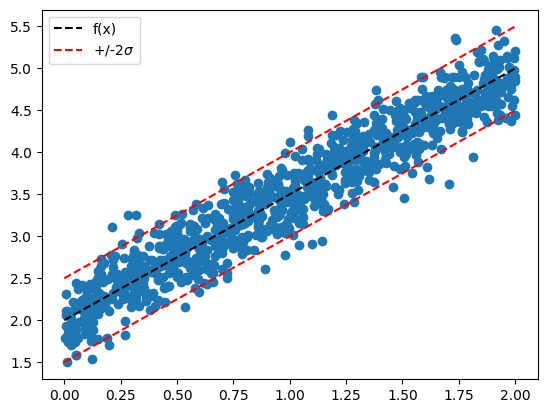

In [2]:
linear_params = {'a': 1.5, 'b': 2.0, 'sigma': 0.25}

def make_linear_data(n_samples, linear_params):

    X = np.random.uniform(low=0.,high=2.,size=(n_samples,1))

    _sigma = linear_params.get('sigma',None)
    
    noise = np.random.normal(loc=0.,scale=_sigma,size=(n_samples,1))

    a = linear_params.get('a',None)
    b = linear_params.get('b',None)
    f_x = a*X + b
    
    y =  f_x + noise

    #y = y.reshape([-1,1])/5.  # Is this important? Divide by 5 ? Why did he do it?
    y = y.reshape([-1,1])  # Is this important? Divide by 5 ? Why did he do it?

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    X_train.shape
    y_train.shape

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
   
# create some data
n_samples = 1000
X_train, y_train, _ = make_linear_data(n_samples,linear_params)  
    
x_grid = np.linspace(0.0,2,100) # for evaluation plots
a = linear_params.get('a',None)
b = linear_params.get('b',None)
_sigma = linear_params.get('sigma',None)

f_x = a* x_grid + b
_delta = 2.0*_sigma  # 2 sigmas

print(f"2 std: {_delta:.2f}")

plt.scatter(X_train,y_train)
plt.plot(x_grid, f_x, 'k--',label='f(x)'); # regression line

plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

plt.legend();

### Linear Data and Heteroscedasticity

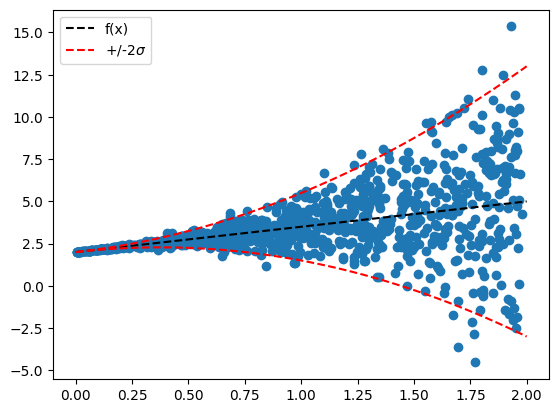

In [3]:
linear_params = {'a': 1.5, 'b': 2.0}

def make_linear_data_heteroscedasticity(n_samples, linear_params):

    X = np.random.uniform(low=0.,high=2.,size=(n_samples,1))

    # Generate the noise with Heteroscedasticity
    #noise = np.random.normal(loc=0, scale=X/5, size=n_samples)
    noise = np.random.normal(loc=0.,scale=1.*np.power(X,2))

    a = linear_params.get('a',None)
    b = linear_params.get('b',None)
    f_x = a*X + b
    
    y =  f_x + noise

    #y = y.reshape([-1,1])/5.  # Is this important? Divide by 5 ? Why did he do it?
    y = y.reshape([-1,1])  # Is this important? Divide by 5 ? Why did he do it?

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    X_train.shape
    y_train.shape

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
   
# create some data
n_samples = 1000
X_train, y_train, _ = make_linear_data_heteroscedasticity(n_samples,linear_params)  
    
plt.scatter(X_train,y_train)

x_grid = np.linspace(0.0,2,100) # for evaluation plots
a = linear_params.get('a',None)
b = linear_params.get('b',None)

# Generate the noise with Heteroscedasticity
_sigma_x = 1.*np.power(x_grid,2)

f_x = a* x_grid + b
_delta = 2.0*_sigma_x  # 2 sigmas

#print(f"2 std: {_delta:.2f}")

plt.plot(x_grid, f_x, 'k--',label='f(x)'); # regression line

plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

plt.legend();

### Non-Linear Data and Homoscedasticity

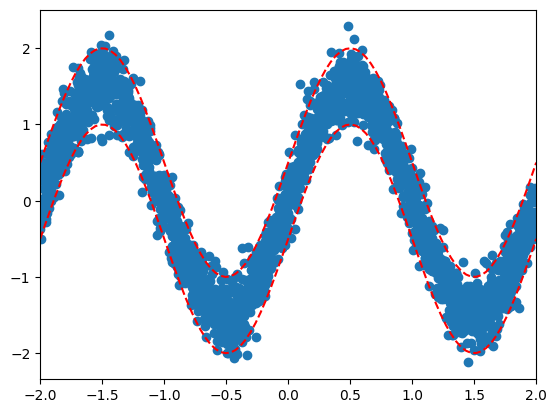

In [52]:
def make_non_linear_data_homoscedasticity(n_samples, _sigma = 0.25):

    X = np.random.uniform(low=-2.,high=2.,size=(n_samples,1))
    noise = np.random.normal(loc=0.,scale=_sigma,size=(n_samples,1))
    y = 1.5*np.sin(np.pi*X) + noise

    # normalization
    y = y.reshape([-1,1])

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
    
# create some data
n_samples = 2500

X_train, y_train, yy_train = make_non_linear_data_homoscedasticity(n_samples)

x_grid = np.linspace(-2,2,100) # for evaluation plots

f_x = 1.5*np.sin(np.pi*x_grid)
_sigma_x = 0.25

y_train.shape
yy_train.shape
 
# TODO: Add f(x) +/- 2 sigma  (NOT SIMPLE. NEEDS TO THINK A LITTLE)
#   f(x) = 1.5*np.sin(np.pi*X[:,0])
#   sigma => see scale in the code np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
plt.scatter(X_train,y_train);

plt.plot(x_grid, f_x + 2.0*_sigma_x, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - 2.0*_sigma_x, 'r--'); # lower boundary prediction

plt.xlim(-2,2);
plt.show();

### Non-Linear Data and Heteroscedasticity

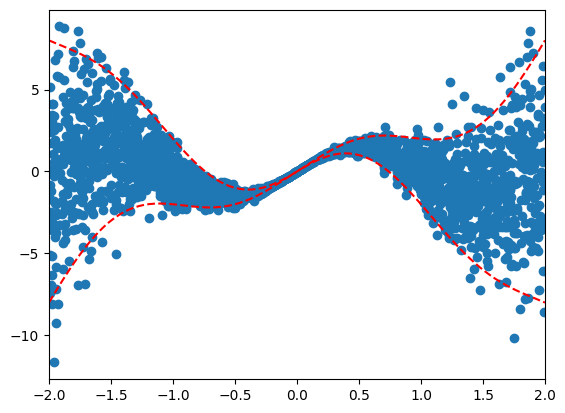

In [4]:
def make_non_linear_data(n_samples):

    X = np.random.uniform(low=-2.,high=2.,size=(n_samples,1))
    uncertanty = np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
    y = 1.5*np.sin(np.pi*X[:,0]) + uncertanty

    # normalization
    y = y.reshape([-1,1])/5.

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
    
# create some data
n_samples = 2500

X_train, y_train, yy_train = make_non_linear_data(n_samples)

x_grid = np.linspace(-2,2,100) # for evaluation plots

f_x = 1.5*np.sin(np.pi*x_grid)
_sigma_x = np.power(x_grid,2)

y_train.shape
yy_train.shape
 
# TODO: Add f(x) +/- 2 sigma  (NOT SIMPLE. NEEDS TO THINK A LITTLE)
#   f(x) = 1.5*np.sin(np.pi*X[:,0])
#   sigma => see scale in the code np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
plt.scatter(X_train,y_train*5.0);

plt.plot(x_grid, f_x + 2.0*_sigma_x, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - 2.0*_sigma_x, 'r--'); # lower boundary prediction

plt.xlim(-2,2);
plt.show();

## Quantile regressor 

**TODO**:

1. Break this nb: Create a new intro_quantile_regression.ipynb 
1. Cite intro_quantile_regression.ipynb here 
1. small description

Disanbiquation:

Linear Quantile Regressor (Statistics)
* alternative to linear regression when there is Heteroscedasticity. Can be seen as generalization of Lnear regression
assumptions (https://stats.stackexchange.com/questions/320991/what-are-the-assumptions-for-applying-a-quantile-regression-model)
* no assumtions about the target distributions (**The main motivation**)
* linearity of the coeficients (LighGBM does not have this assumtions)
* independence of observations
* very large sample size, as quantile regression is not very efficient
* y is "very" continuos


LightGBM quantile regressor (Machine Learning)

* Quantile is used to predict intervals of target variable
* The main difference related to generic regression is the loss function:
pinball loss: pos slope is  and negative slope is  (https://www.lokad.com/pinball-loss-function-definition#:~:text=The%20pinball%20loss%20function%20is,forecast%20is%20a%20subtle%20problem.)
 * $\tau = 0.5$ the loss is symetric
 * $\tau < 0.5$ penalizes more the positive error (see inclimation of the loss)
 * $\tau > 0.5$ penalizes more the negative side
* based on R doc: https://astrostatistics.psu.edu/datasets/R/html/quantreg/html/rq.html
    * $\tau$ is the quantile to be predict, so in python is 
* LIGHGBM $\alpha$ is the quantile we want to predict

In [19]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

grid_size = 150

X_train = X_train.reshape(-1, 1)
X_train.shape

params = {
    'objective': 'quantile',
    'metric': 'quantile',
    'max_depth': 2,
    'num_leaves': 10,
    'learning_rate': 0.1,
    'n_estimators': 150,
    'boosting_type': 'gbdt'
}

y_preds = np.zeros((grid_size, 3))
quantiles = [.05, .5, .95]

x_grid = np.linspace(0.0,2.0,grid_size).reshape(-1, 1)

y_preds.shape
x_grid.shape

for i in range(len(quantiles)):
    print('prediction of quantile', quantiles[i])
    lgb = LGBMRegressor(alpha=quantiles[i], **params)
    model = lgb.fit(X_train, y_train)
    y_preds[:, i] = model.predict(x_grid)

(15000, 1)

(150, 3)

(150, 1)

prediction of quantile 0.05
prediction of quantile 0.5
prediction of quantile 0.95


<Figure size 1500x600 with 0 Axes>

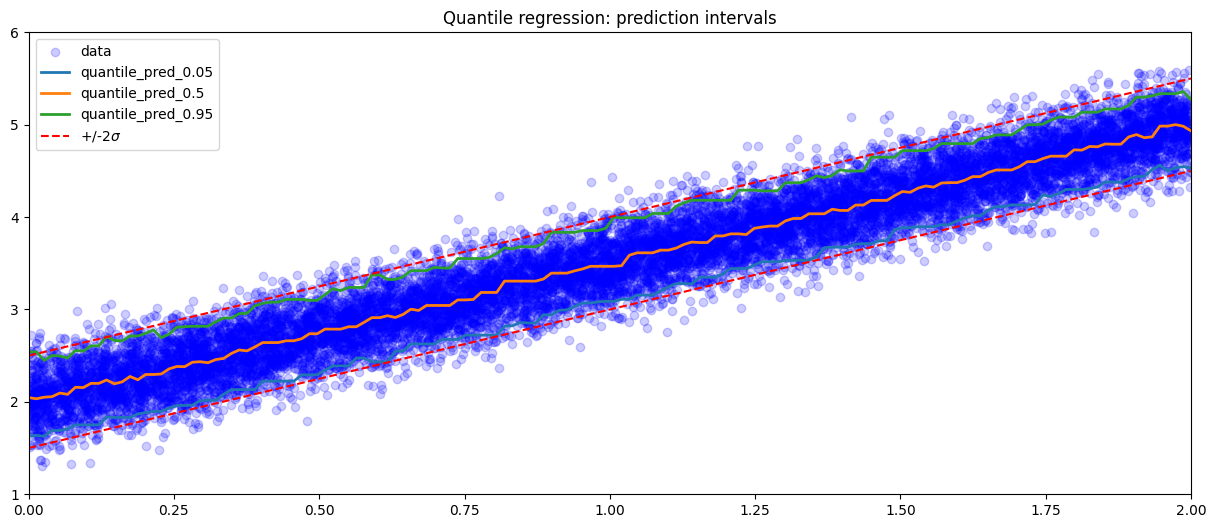

In [20]:
plt.figure(figsize=[15, 6])

a = linear_params.get('a',None)
b = linear_params.get('b',None)
_sigma = linear_params.get('sigma',None)

f_x = a* x_grid + b
_delta = 2.0*_sigma

plt.scatter(X_train, y_train, label='data', alpha=.2, color='blue')
for i in range(len(quantiles)):
    _ = plt.plot(x_grid, y_preds[:, i], label='quantile_pred_{}'.format(quantiles[i]),linewidth=2)
    
_ = plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
_ = plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

_ = plt.title('Quantile regression: prediction intervals')

_ = plt.xlim(0.0,2.0)
_ = plt.ylim(1.0,6.0)
_ = plt.legend();
_ = plt.show()

### Quantile regressin

In [35]:
params = {
    'objective': 'quantile',
    'metric': 'quantile',
    'max_depth': 2,
    'num_leaves': 10,
    'learning_rate': 0.1,
    'n_estimators': 150,
    'boosting_type': 'gbdt'
}

quantile_preds = np.zeros((grid_size, 2))
quantiles = [.05, .95]

#x_grid = np.linspace(0.0,2.0,grid_size).reshape(-1, 1)

# y_preds.shape
# x_grid.shape

for i in range(len(quantiles)):
    print('prediction of quantile', quantiles[i])
    lgb = LGBMRegressor(alpha=quantiles[i], **params)
    model = lgb.fit(X_train.reshape(-1, 1), y_train)
    quantile_preds[:, i] = model.predict(x_grid.reshape(-1, 1))
    
    
lower_qr_pred = quantile_preds[:, 0]
upper_qr_pred = quantile_preds[:, 1]

prediction of quantile 0.05
prediction of quantile 0.95


### Ploting (Show me dont tell me)

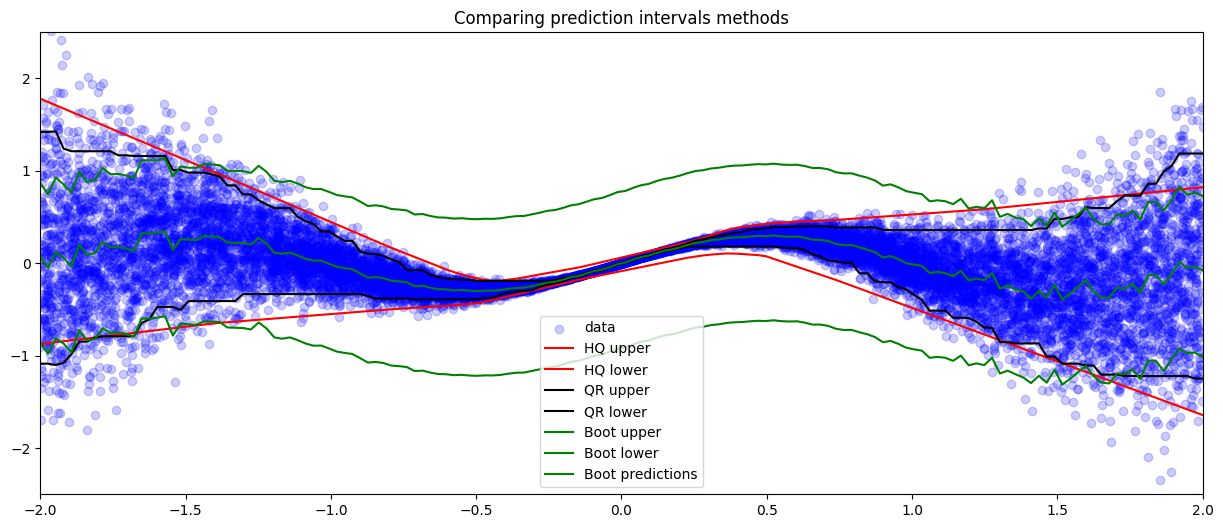

Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


In [38]:
_ = plt.figure(figsize=[15, 6])

_ = plt.scatter(X_train, y_train, label='data', alpha=.2, color='blue')

# HQ PI 
_ = plt.plot(x_grid, upper_hq_pred, color='r',label='HQ upper') # upper boundary prediction
_ = plt.plot(x_grid, lower_hq_pred, color='r',label='HQ lower') # lower boundary prediction

# Quantile
_ = plt.plot(x_grid, upper_qr_pred, color='k',label='QR upper') # upper boundary prediction
_ = plt.plot(x_grid, lower_qr_pred, color='k',label='QR lower') # lower boundary prediction

# Bootstrap
_ = plt.plot(x_grid, upper_boot_pred, color='g',label='Boot upper') # upper boundary prediction
_ = plt.plot(x_grid, lower_boot_pred, color='g',label='Boot lower') # lower boundary prediction
_ = plt.plot(x_grid, pred_boot, color='g',label='Boot predictions') # lower boundary prediction


_ = plt.title('Comparing prediction intervals methods')
_ = plt.xlim(-2,2);
_ = plt.ylim(-2.5,2.5);
_ = plt.legend();
_ = plt.show()